## EX 4

In [1]:
id1 = "313593980"
id2 = "312244197"

name_student_1 = "binyamin, yagoda"
name_student_2 = "yonatan, yamin"

import pandas as pd
df = pd.DataFrame([id1,id2])
# Uncomment in case two students are doing the assignment together
df = pd.DataFrame([id1])
#df = pd.DataFrame([id1,id2])
df.to_clipboard(index=False,header=False)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [3]:
url = 'https://raw.githubusercontent.com/ShaiYona/Data-Science2021B/main/Assignments/4/nba.csv'
NBA_df = pd.read_csv(url)

### Q1  'Age','Height','Weight','Salary' השמטת ערכים חסרים והצגת עמודות   

In [4]:
NBA_player_df = NBA_df[['Age','Height','Weight','Salary']].dropna()
NBA_player_df.head(3)

Age Height  Weight     Salary
0  25.0    6-2   180.0  7730337.0
1  25.0    6-6   235.0  6796117.0
3  22.0    6-5   185.0  1148640.0

## Q2 המרת עמודת הגובה לס"מ והצגת שלוש שורות ראשונות 

In [5]:
def to_cm (Height):
    Height = Height.split('-')
    feet = float(Height[0])
    inch = float(Height[1])
    return (feet*12+inch)*2.54
NBA_player_df['Height'] = NBA_player_df.Height.apply(to_cm)
NBA_player_df[['Age','Height','Weight','Salary']].head(3)

Age  Height  Weight     Salary
0  25.0  187.96   180.0  7730337.0
1  25.0  198.12   235.0  6796117.0
3  22.0  195.58   185.0  1148640.0

## Q3 הצגת נתונים עבור העמודה של תפקיד השחקן בתרשים עוגה וטורים 


## בתרשים העוגה המידע נראה יותר ברור ובנוסף יש חלוקה לאחוזים. אבל בתרשים הטורים ניתן לראות את הכמות שיש בכל עמדה.
## לנו יותר נח תרשים עוגה

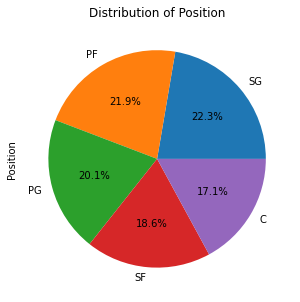

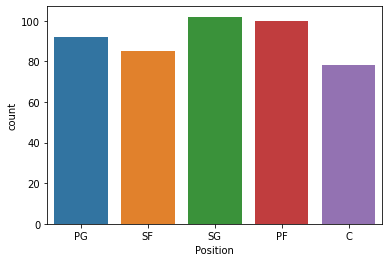

In [6]:
plt.figure(2, figsize=(5,5))
plt.title("Distribution of Position")
NBA_df['Position'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()
sns.countplot( x="Position", data=NBA_df)


#### Q4  פיצול הדאטה ביחס של 30% למבחן ו70% לאימון והצגת 5 שורות ראשונות של האימון

In [7]:
X = NBA_player_df[['Age','Height','Weight']]
y = NBA_player_df[['Salary']]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()


Age  Height  Weight
159  24.0  203.20   225.0
162  31.0  210.82   232.0
279  27.0  187.96   175.0
232  33.0  205.74   245.0
445  20.0  198.12   190.0

### הצגת חמש שורות ראשונות של המטרה המשמשות למבחן

In [8]:
y_test.head()

Salary
449   1348440.0
426  16744218.0
308   1499187.0
420    222888.0
143  15851950.0

## Q5  Regressor בחרנו להשתמש במודל 

## המודל הזה מתאים יותר להצגה נומרית כמו משכורת המודל השני מתאים להצגה קטגורית

In [9]:
model1 = sk.tree.DecisionTreeRegressor(random_state=0)


## Q6 אימון המודל וחישוב הדיוק הריבועי

In [10]:
model1.fit(X_train,y_train)
prediction1 = model1.predict(X_test)
mean_squared_error(y_test, prediction1,squared = False)

7090033.842784743

## Q7 הוספת עמודה של עמדת השחקן ובדיקת ערך הסטיה

In [11]:


X['Position'] = NBA_df['Position'].dropna().astype('category').cat.codes
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
model2 = sk.tree.DecisionTreeRegressor(random_state=0)
model2.fit(X_train,y_train)
prediction2 = model2.predict(X_test)
mean_squared_error(y_test, prediction2,squared = False)

7379262.785127141

## Q8 שימוש בעומק על מנת לשפר את ביצועי המודל

In [12]:
model3 = sk.tree.DecisionTreeRegressor(max_depth=1,random_state=0)
model3.fit(X_train,y_train)
prediction3 = model3.predict(X_test)
mean_squared_error(y_test, prediction3,squared = False)

5233706.523466841